In [3]:
#Reading the document
import pandas as pd
movies=pd.read_csv("tmdb_5000_movies.csv",sep=",")
print(movies.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [4]:
#Eliminating unnecessary attributes such as language, budget,revenue, etc.
movies = movies[['title', 'tagline', 'overview', 'genres', 'popularity']]
movies.tagline.fillna('', inplace=True)
movies['description'] = movies['tagline'].map(str) + ' ' + movies['overview']
movies.dropna(inplace=True)
movies.head(5)

<ipython-input-4-8a443cb1aff4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.tagline.fillna('', inplace=True)
<ipython-input-4-8a443cb1aff4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['description'] = movies['tagline'].map(str) + ' ' + movies['overview']
<ipython-input-4-8a443cb1aff4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace=Tr

,title,tagline,overview,genres,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart..."


In [5]:
import nltk
import re
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')
#preprocessing and normalizing text
def normalize_document(doc):
  stop_words = nltk.corpus.stopwords.words('english')
  # lower case and remove special characters\whitespaces
  doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
  doc = doc.lower()
  doc = doc.strip()
  # tokenize document
  tokens = nltk.word_tokenize(doc)
  # filter stopwords out of document
  filtered_tokens = [token for token in tokens if token not in stop_words]
  # re-create document from filtered tokens
  doc = ' '.join(filtered_tokens)
  return doc
normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(list(movies['description']))
print(norm_corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['enter world pandora 22nd century paraplegic marine dispatched moon pandora unique mission becomes torn following orders protecting alien civilization'
 'end world adventure begins captain barbossa long believed dead come back life headed edge earth turner elizabeth swann nothing quite seems'
 'plan one escapes cryptic message bonds past sends trail uncover sinister organization battles political forces keep secret service alive bond peels back layers deceit reveal terrible truth behind spectre'
 ...
 'signed sealed delivered introduces dedicated quartet civil servants dead letter office us postal system transform elite team lostmail detectives determination deliver seemingly undeliverable takes post office unpredictable world letters packages past save lives solve crimes reunite old loves change futures arriving late always miraculously time'
 'new yorker shanghai ambitious new york attorney sam sent shanghai assignment immediately stumbles legal mess could end career help beautiful 

In [6]:
#vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 2), min_df=2)
tfidf_matrix = tf.fit_transform(norm_corpus)
tfidf_matrix.shape

(4800, 20667)

In [7]:
#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_matrix)
cos_sim_df = pd.DataFrame(cos_sim)
cos_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799
0,1.000000,0.010701,0.000000,0.019030,0.028687,0.024901,0.000000,0.026516,0.000000,0.007420,...,0.009702,0.0,0.023336,0.033549,0.000000,0.000000,0.0,0.006892,0.000000,0.000000
1,0.010701,1.000000,0.011891,0.000000,0.041623,0.000000,0.014564,0.027122,0.034688,0.007614,...,0.009956,0.0,0.004818,0.000000,0.000000,0.012593,0.0,0.022391,0.013724,0.000000
2,0.000000,0.011891,1.000000,0.000000,0.000000,0.000000,0.000000,0.022242,0.015854,0.004891,...,0.042617,0.0,0.000000,0.000000,0.016519,0.000000,0.0,0.011682,0.000000,0.004000
3,0.019030,0.000000,0.000000,1.000000,0.008793,0.000000,0.015976,0.023172,0.027452,0.073610,...,0.000000,0.0,0.009667,0.000000,0.000000,0.000000,0.0,0.028354,0.021785,0.027735
4,0.028687,0.041623,0.000000,0.008793,1.000000,0.000000,0.022912,0.028676,0.000000,0.023538,...,0.014800,0.0,0.000000,0.000000,0.000000,0.010760,0.0,0.010514,0.000000,0.000000


In [8]:
#listing the movies
movies_list = movies['title'].values
movie_idx = np.where(movies_list == 'The Truman Show')[0][0]
#obtaining similarities
movie_similarities = cos_sim_df.iloc[movie_idx].values
#sorting the top 10 similarities
similar_movie_idxs = np.argsort(-movie_similarities)[1:11]
similar_movies = movies_list[similar_movie_idxs]
#creating a dataframe for the top 10 movies
simdf = pd.DataFrame(movie_similarities)
sim10 = simdf.loc[similar_movie_idxs]
title10 = pd.DataFrame(similar_movies, similar_movie_idxs)
top10 = pd.concat([sim10, title10], axis=1)
top10.columns = ['Similarity' , 'Title']
top10

,Similarity,Title
2839,0.172310,Top Five
1593,0.160623,The Three Stooges
1971,0.136425,Nurse Betty
1232,0.115154,Morning Glory
2231,0.111422,Strange Wilderness
66,0.096734,Up
3065,0.095522,Black or White
4355,0.094876,October Baby
1762,0.093664,Dark City
2284,0.088957,The Shining


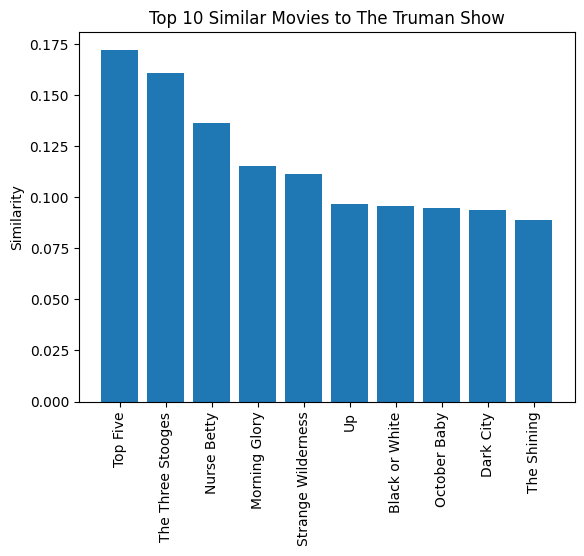

In [9]:
#plot
from matplotlib import pyplot as plt
plt.bar(top10['Title'], top10['Similarity'])
plt.title('Top 10 Similar Movies to The Truman Show')
plt.ylabel('Similarity')
plt.xticks(rotation=90)
plt.show()